In [2]:
import mne
import numpy as np
from glob import glob
from sys import platform
import os
from blink_utils import *
import mat73

# Path to FIF files

In [39]:
SUBJECT = 3

FIF_PATH = os.path.join('..', '..', '2-mat-to-npy-fif', 'fif')
BLINK_SUMMARY_PATH = os.path.join(
    '..', 
    '..', 
    '3-find-blinks', 
    '3.1-eeglab-blinker', 
    'blinkerDumpDir', 
    f'dataSub{SUBJECT}_BlinkSummary.mat',
)

# output paths
MERGED_FIF_PATH = 'merged-fif'

# only for debugging trial order (if needed)
STIM_MAT_PATH = os.path.join('..', '..', '1-source-data', 'datasetCND_musicImagery', 'dataCND', 'dataStim.mat')
EEG_MAT_PATH = os.path.join('..', '..', '1-source-data', 'datasetCND_musicImagery', 'dataCND') # append .mat paths for each subject below

In [5]:
DATA_FILES = glob(os.path.join(FIF_PATH, f'subject-{SUBJECT}_*.fif'))
DATA_FILES = list(set(DATA_FILES)) # only get unique paths, sub3 is somehow returning trial 66 twice
DATA_FILES = sorted(DATA_FILES) # to sort by run#
DATA_FILES

['../../2-mat-to-npy-fif/fif/subject-3_trial-00_chor-096_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-01_chor-038_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-02_chor-038_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-03_chor-101_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-04_chor-019_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-05_chor-019_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-06_chor-096_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-07_chor-038_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-08_chor-038_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-09_chor-038_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-10_chor-101_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-3_trial-11_chor-

In [6]:
print(len(DATA_FILES))
assert len(DATA_FILES)==11*8

88


Combine all raws for one subject (that is one recording session)

In [7]:
RAWS_SUB = {}

for DATA_FILE in DATA_FILES: #[:2*5]:
    
    raw = mne.io.read_raw_fif(DATA_FILE, preload=True)
    fname = str(raw.filenames[0]).split(os.path.sep)[-1].rstrip('_raw.fif')
    
    toks = fname.split('_')
    subject = int(toks[0].split('-')[-1])
    condition = toks[2] + '/' + toks[3].lstrip('condition-')

    if not subject in RAWS_SUB:
        RAWS_SUB[subject] = []
    RAWS_SUB[subject].append(raw)
    
    #print(fname, subject, condition, run)
print(RAWS_SUB)

Opening raw data file ../../2-mat-to-npy-fif/fif/subject-3_trial-00_chor-096_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-3_trial-01_chor-038_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-3_trial-02_chor-038_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-3_trial-03_chor-101_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-3_trial-04_chor-019_condition-Listening_raw

In [8]:
RAWS_SUB[SUBJECT]

[<Raw | subject-3_trial-00_chor-096_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-3_trial-01_chor-038_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-3_trial-02_chor-038_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-3_trial-03_chor-101_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-3_trial-04_chor-019_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-3_trial-05_chor-019_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-3_trial-06_chor-096_condition-Imagery_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-3_trial-07_chor-038_condition-Imagery_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-3_trial-08_chor-038_condition-Imagery_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-3_trial-0

In [9]:
merged_raws = mne.concatenate_raws(RAWS_SUB[SUBJECT])
merged_raws

<Raw | subject-3_trial-00_chor-096_condition-Listening_raw.fif, 68 x 158664 (2479.1 s), ~82.4 MiB, data loaded>

Using matplotlib as 2D backend.


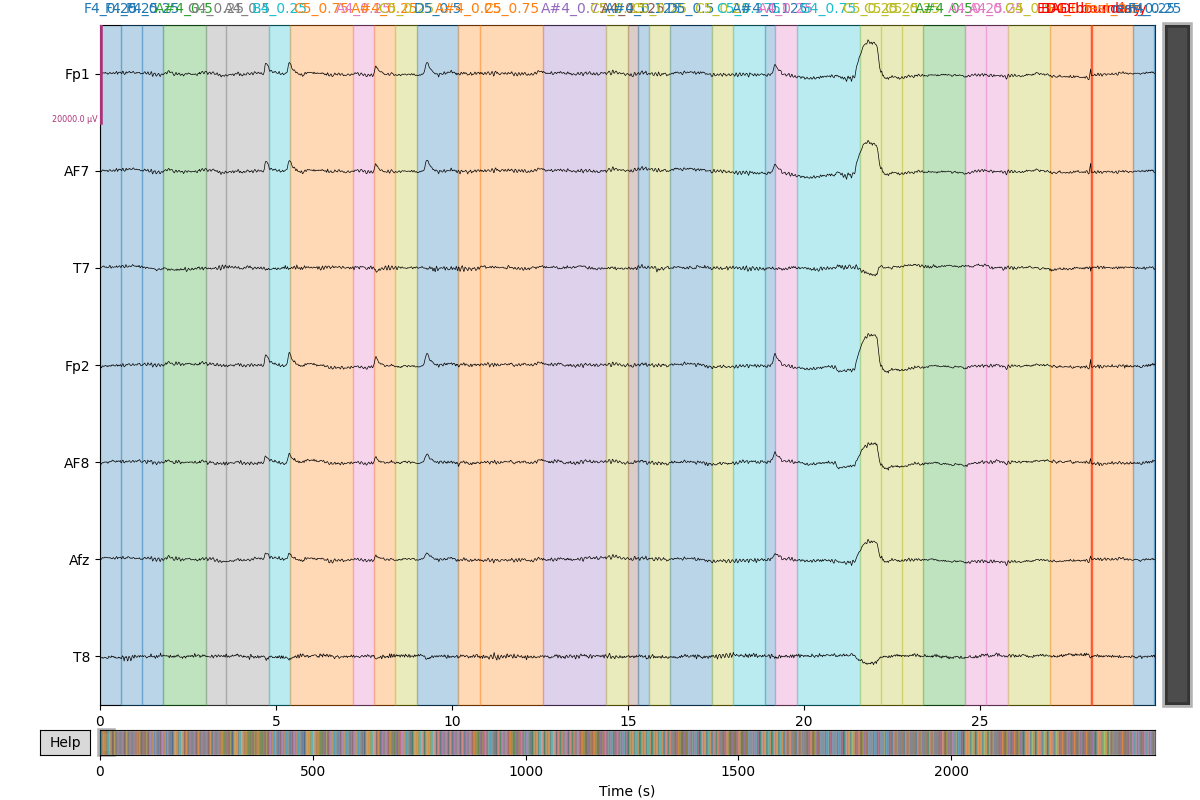

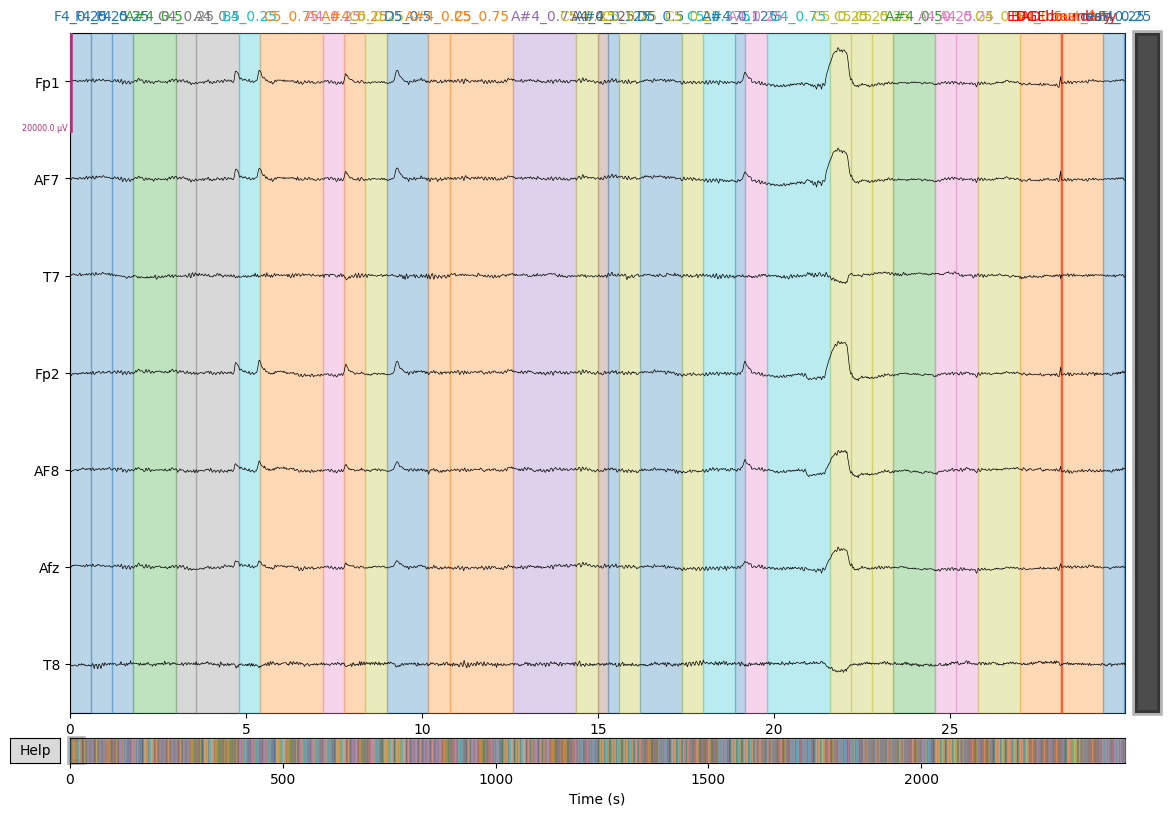

In [10]:
%matplotlib widget 
scalings = {'eeg': 10e-3}

merged_raws.plot(
    scalings = scalings,
    n_channels = 64,
    start = 0, 
    duration = 30, #28.125, #2.4*6,
    picks = ['Fp1', 'Fp2', 'AF7', 'AF8', 'Afz', 'T7', 'T8']
)

In [11]:
note_annot = merged_raws.annotations

In [12]:
mne.count_annotations(merged_raws.annotations)

{'A#4_0.125': 66,
 'A#4_0.25': 220,
 'A#4_0.5': 44,
 'A#4_0.75': 22,
 'A4_0.125': 22,
 'A4_0.25': 308,
 'A4_0.5': 44,
 'B4_0.125': 44,
 'B4_0.25': 88,
 'B4_0.5': 22,
 'B4_0.75': 22,
 'BAD boundary': 87,
 'C#4_0.25': 22,
 'C#5_0.125': 132,
 'C#5_0.25': 352,
 'C4_0.25': 22,
 'C5_0.125': 66,
 'C5_0.25': 330,
 'C5_0.375': 44,
 'C5_0.5': 66,
 'C5_0.75': 44,
 'D#5_0.125': 66,
 'D#5_0.25': 110,
 'D4_0.125': 22,
 'D4_0.25': 44,
 'D4_0.75': 22,
 'D5_0.125': 22,
 'D5_0.25': 132,
 'D5_0.5': 66,
 'E4_0.125': 22,
 'E4_0.25': 88,
 'E4_0.5': 22,
 'E5_0.25': 22,
 'EDGE boundary': 87,
 'F#4_0.25': 110,
 'F#4_0.75': 22,
 'F#5_0.25': 22,
 'F4_0.125': 22,
 'F4_0.25': 176,
 'F4_0.5': 66,
 'F5_0.125': 22,
 'F5_0.25': 88,
 'G#4_0.25': 22,
 'G4_0.125': 22,
 'G4_0.25': 330,
 'G4_0.5': 22,
 'G4_0.75': 22,
 'rest_0.25': 66,
 'rest_0.5': 44}

In [13]:
boundary_annot = note_annot[note_annot.description == 'BAD boundary']
boundary_annot

<Annotations | 87 segments: BAD boundary (87)>

In [14]:
blink_summary = {}

if not SUBJECT in blink_summary.keys():
    blink_summary[SUBJECT] = mat73.loadmat(BLINK_SUMMARY_PATH)

blinks = blink_summary[SUBJECT]['blinks']
status = blinks['status']
print(f'Subject {SUBJECT}: {status}')

usedSignal = blinks['usedSignal']
print('usedSignal', usedSignal)

if type(blinks['signalData']) == list:
    n_signals = len(blinks['signalData'])
    print(f'# signals = {n_signals}')
    usedSignalIdx = np.where([x['signalNumber'] for x in blinks['signalData']] == blinks['usedSignal'])[0][0]
    signal = blinks['signalData'][usedSignalIdx]['signal']
else:
    signal = blinks['signalData']['signal']

blinkFits = blink_summary[SUBJECT]['blinkFits']
maxFrame = [int(x)-1 for x in blinkFits['maxFrame']] # convert to 0 index

signal = blink_summary[SUBJECT]['blinks']['signalData']['signal']
usedSignal = blink_summary[SUBJECT]['blinks']['usedSignal']
# blinkPositions[:, 2]

print('Total blinks:', int(blinks['signalData']['numberBlinks']))
print('Good blinks:', int(blinks['signalData']['numberGoodBlinks']))

Subject 3: failure: [Good ratio too low]
usedSignal -1.0
Total blinks: 569
Good blinks: 334


Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB



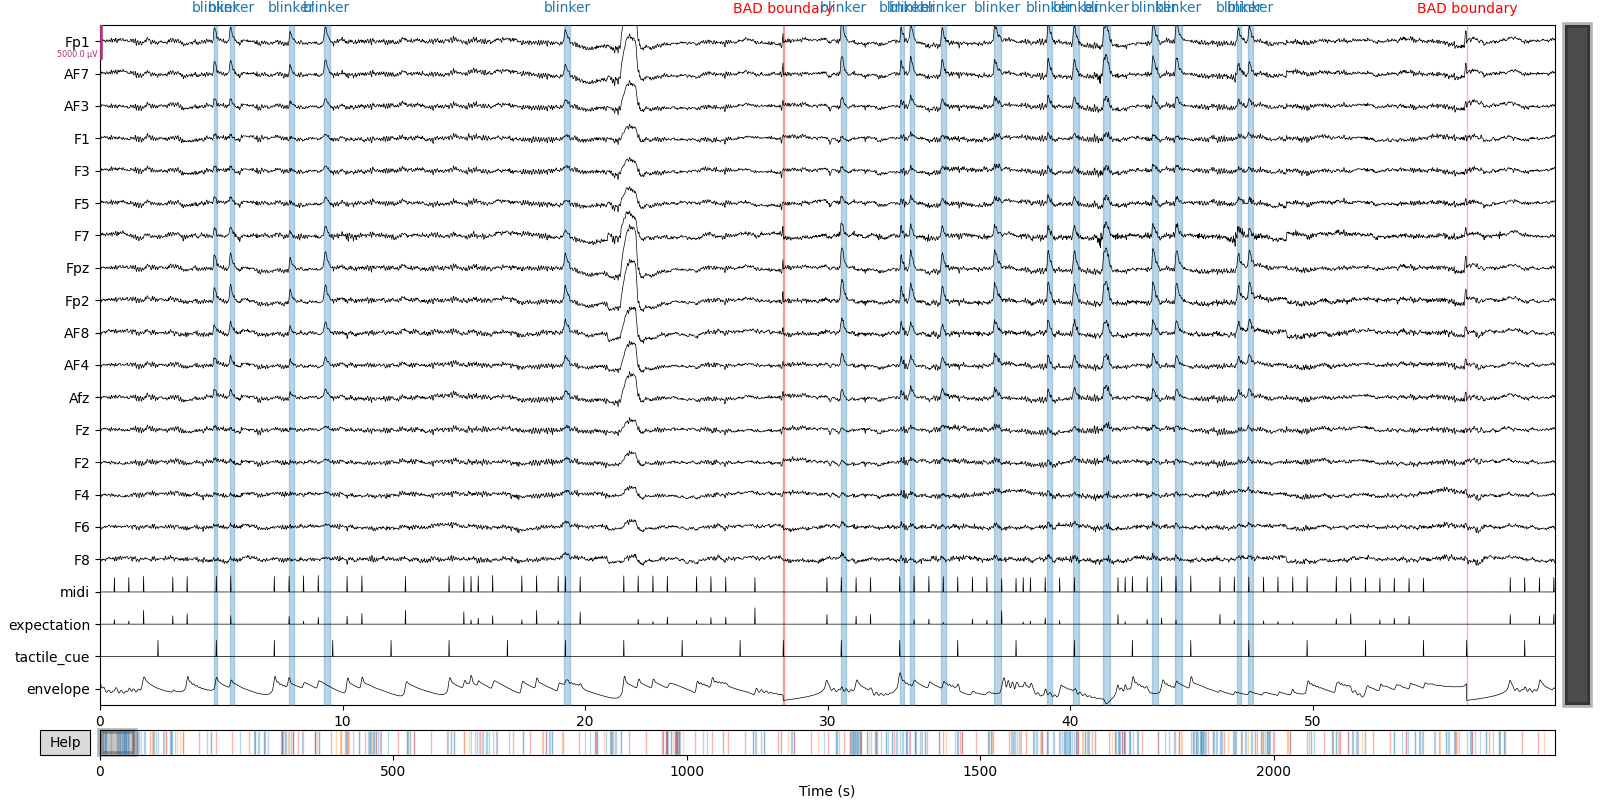

In [16]:
%matplotlib widget 

not_detected = [28, 56, 1199] # questionable blinks not detected by BLINKER at all

t_manual_blinks = [89, 112, 130, 136, 141, 314.5, 320, 328, 369, 402, 410, 411, 420, 424, 464, 528.5, 597.5, 621, 629, 645, 753.5, 788, 859, 975.7, 993]
# removed 650 as looking small
t_manual_blinks.extend([1062, 1159.5, 1172, 1223, 1295, 1311, 1320, 1399, 1442, 1513.5, 1520, 1567, 1602, 1674, 1695, 1724, 1842, 1844, 1922, 1944, 1956, 1968, 1980, 1982, 1991])
t_manual_blinks.extend([2023, 2063, 2098, 2110, 2151, 2155, 2283, 2309, 2312, 2460])

t_bad_blinker = [329, 367, 471, 965, 980, 982, 1278, 1430, 1468, 1613, 1667, 1730, 1741.5, 1744, 1837.5, 2126]

t_bad_saccades = None 
'''
                [22, 48.5, 103, 
                  131, 162, 190, 
                  218, 246, 274, 
                  300, 331, 357, 384, 
                  415, 443, 455, 476, 478, 480, 
                  500, 526, 556, 585, 
                  613, 640, 669, 695,
                  725, 753, 781, 
                  810, 838, 874, 
                  976, 979, 981, 983, 
                  1069, 
                  1199, 
                  1442, 
                  1516, 
                  1636, 
                  1729, 1733, 1742, 
                  1926, 1927, 1940, 1943, 
                  2116, 2133, 2148, 
                  2283, 
                  2325.
                ]
'''

mne.set_config('MNE_BROWSE_RAW_SIZE','16,8') # https://mne.discourse.group/t/can-adjust-raw-plot-figure-size-using-rc-settings-in-v-24/3926/5

# Add blink annotations (note annots will be added back later)
plot_annot(
    merged_raws=merged_raws, 
    boundary_annot=boundary_annot, 
    blink_summary=blink_summary, 
    SUBJECT=SUBJECT,
    t_manual_blinks=t_manual_blinks,
    t_bad_blinker=t_bad_blinker,
    t_bad_saccades=t_bad_saccades,
    butterfly = False,
    highpass = .1,
    lowpass = 30,
)

# Find Eye Sweeps

Split back into epochs

In [17]:
events, event_id = mne.events_from_annotations(merged_raws, regexp = "")
events = np.concatenate(([[0, 0, event_id['BAD boundary']]], events), axis=0)
events

Used Annotations descriptions: ['BAD blinker', 'BAD boundary', 'blinker', 'manual']


array([[     0,      0,      2],
       [   300,      0,      3],
       [   342,      0,      3],
       ...,
       [155058,      0,      2],
       [156861,      0,      2],
       [157461,      0,      4]])

In [18]:
event_id

{'BAD blinker': 1, 'BAD boundary': 2, 'blinker': 3, 'manual': 4}

In [19]:
merged_raws.n_times

158664

In [20]:
trial_epochs = mne.Epochs(
    merged_raws,
    events = events[events[:, 2] == event_id['BAD boundary']],
    tmin = 0,
    tmax = 1802 / merged_raws.info['sfreq'],
    reject = None,
    flat = None,
    baseline = None,
    reject_by_annotation = False,
    preload = True,
)

Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 88 events and 1803 original time points ...
0 bad epochs dropped


In [21]:
trial_epochs.get_data(copy=True).shape

(88, 68, 1803)

In [22]:
from mne.preprocessing import ICA

ica = ICA(
    n_components = 10, 
    random_state = 2024, 
    method = 'infomax',
    max_iter = 10000,
)

ica.fit(trial_epochs)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/tmp/ipykernel_2624342/2610967279.py:10: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(trial_epochs)


Selecting by number: 10 components
Computing Infomax ICA
Fitting ICA took 8.0s.


<ICA | epochs decomposition, method: infomax (fit in 10000 iterations on 158664 samples), 10 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>

Get an epoch order resorted by chor-cond to visualize eye sweep IC

In [24]:
condOrder = []
chorOrder = []
trialOrder = []

for filename in merged_raws.filenames:
    filename = str(filename).split(os.path.sep)[-1]
    toks = filename.split('_')
    trial = int(toks[1].split('-')[-1])
    chor = toks[2]
    cond = toks[3].split('-')[-1]

    trialOrder.append(trial)
    chorOrder.append(chor)
    condOrder.append(cond)

In [25]:
import pandas as pd
df = pd.DataFrame()
df['trial'] = trialOrder
df['condition'] = condOrder
df['chorale'] = chorOrder
df

trial  condition   chorale
0       0  Listening  chor-096
1       1  Listening  chor-038
2       2  Listening  chor-038
3       3  Listening  chor-101
4       4  Listening  chor-019
..    ...        ...       ...
83     83    Imagery  chor-096
84     84    Imagery  chor-038
85     85    Imagery  chor-101
86     86    Imagery  chor-019
87     87    Imagery  chor-019

[88 rows x 3 columns]

In [26]:
df_sorted = df.sort_values(by = ['chorale', 'condition'])
df_sorted

trial  condition   chorale
19     19    Imagery  chor-019
20     20    Imagery  chor-019
21     21    Imagery  chor-019
32     32    Imagery  chor-019
42     42    Imagery  chor-019
..    ...        ...       ...
59     59  Listening  chor-101
70     70  Listening  chor-101
80     80  Listening  chor-101
81     81  Listening  chor-101
82     82  Listening  chor-101

[88 rows x 3 columns]

In [27]:
sortOrder = list(df_sorted['trial'])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated


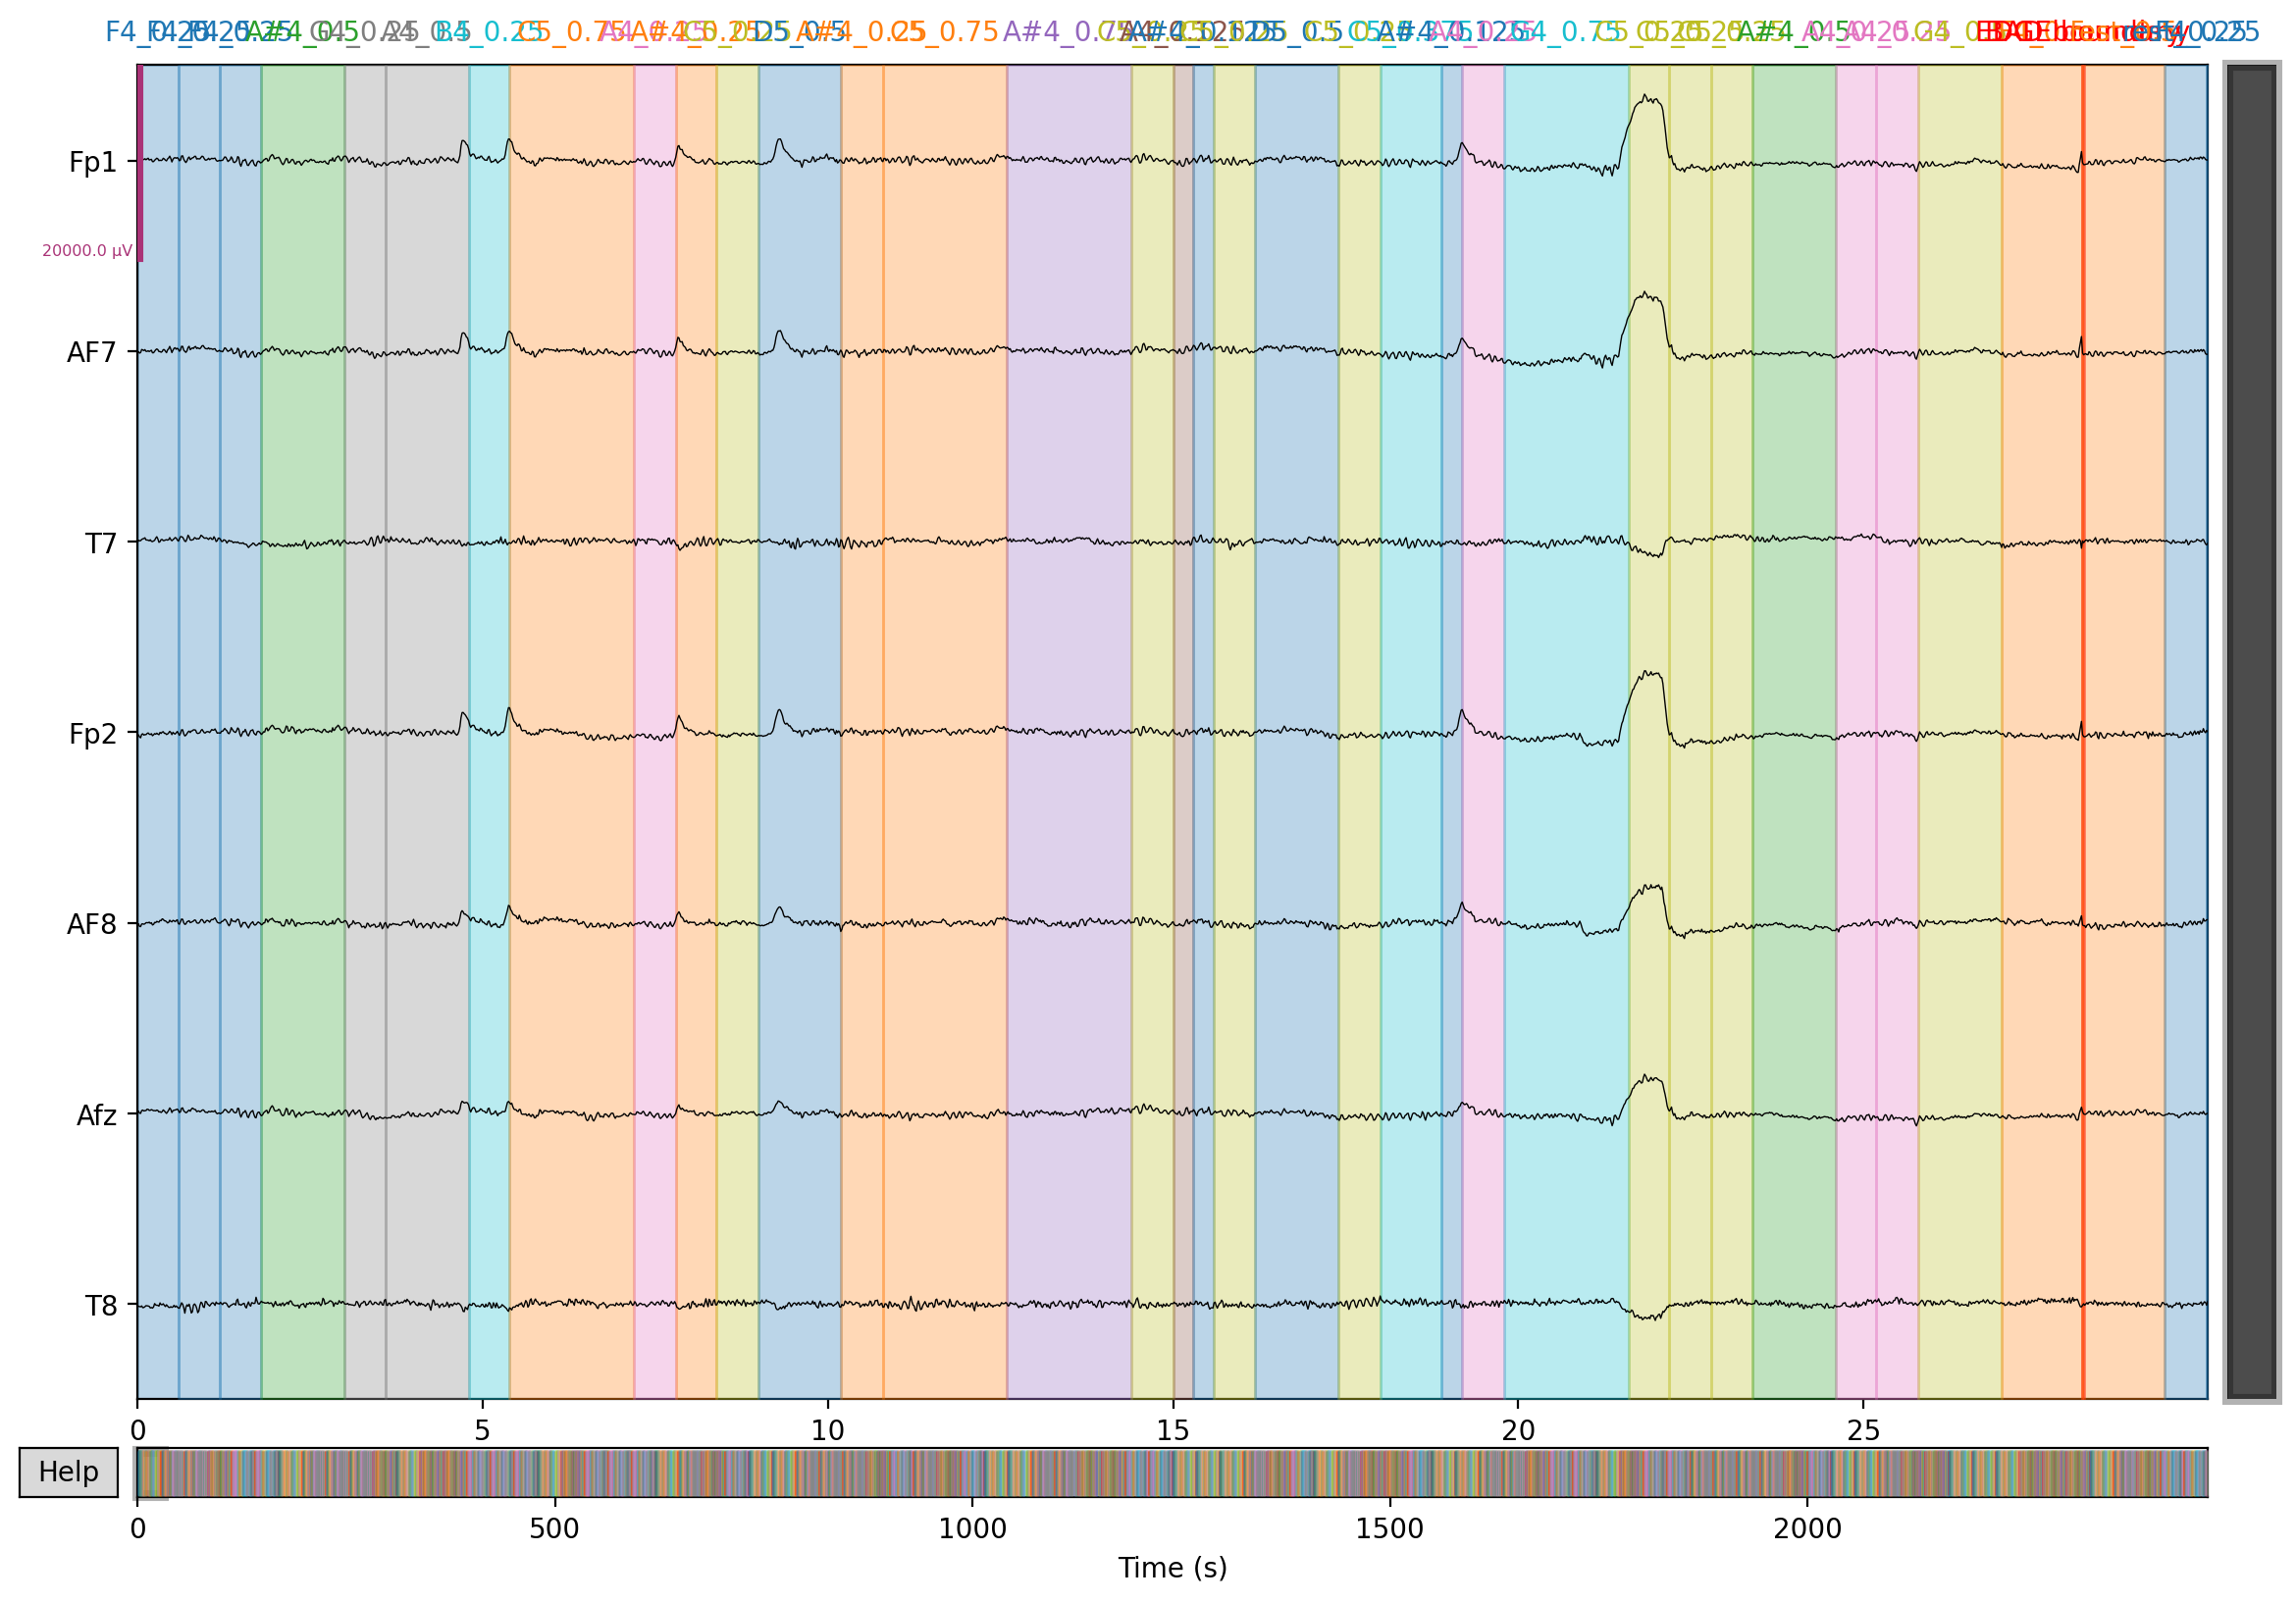

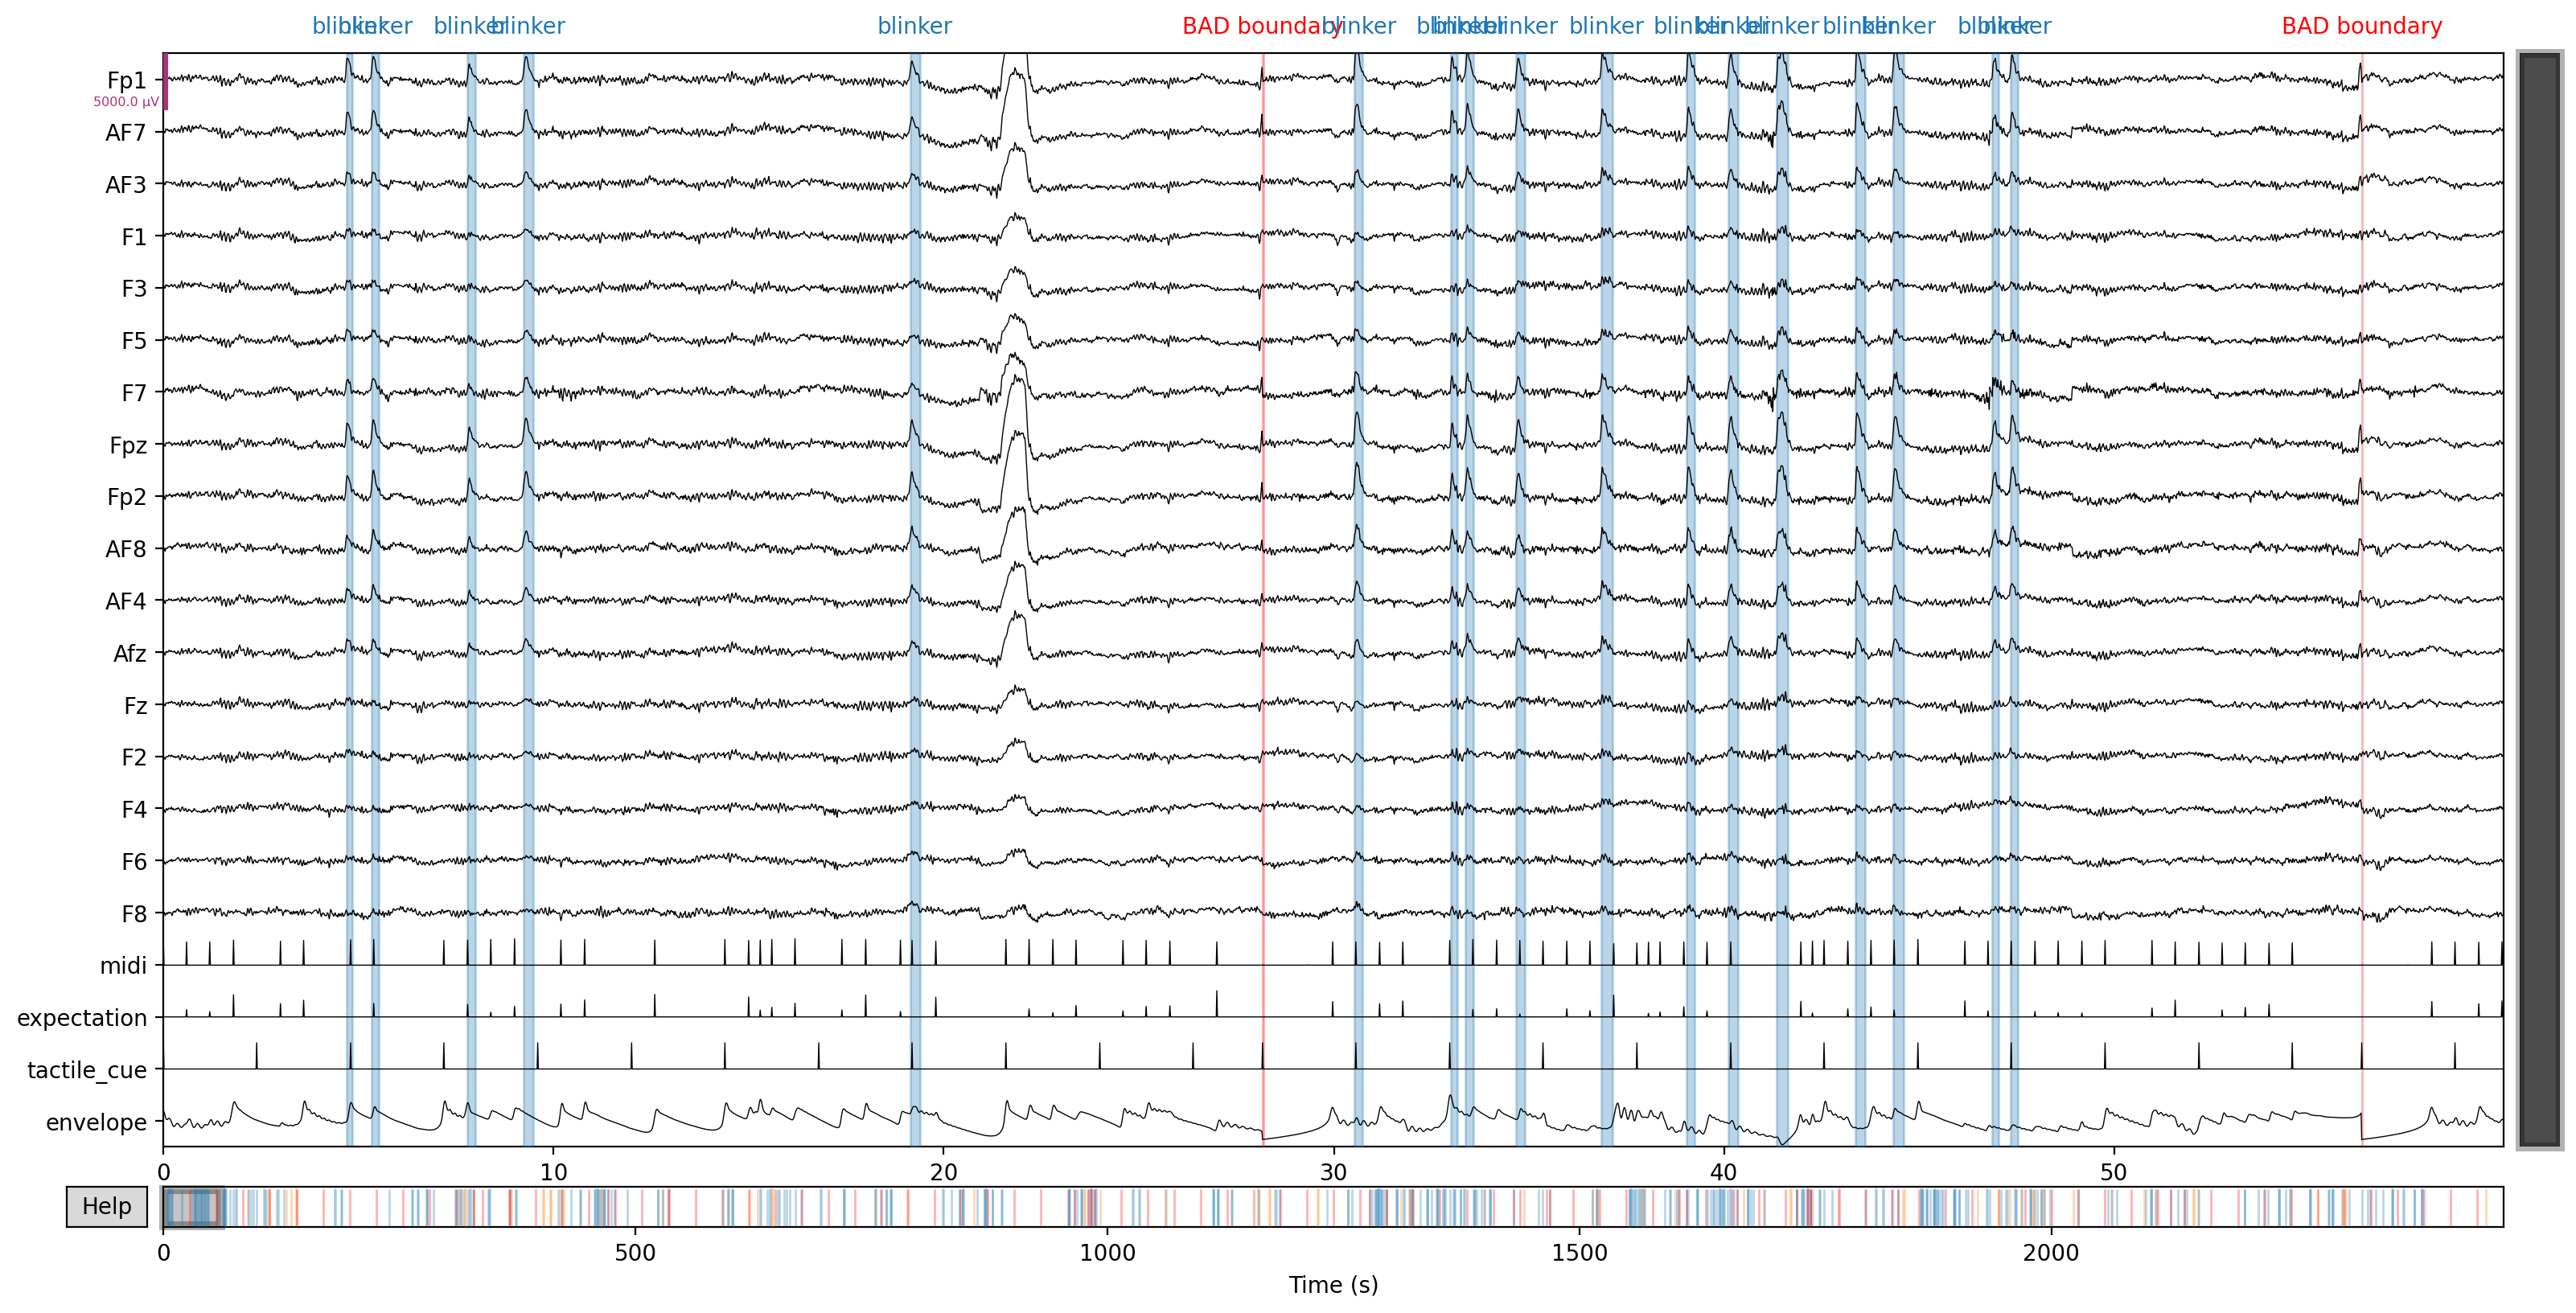

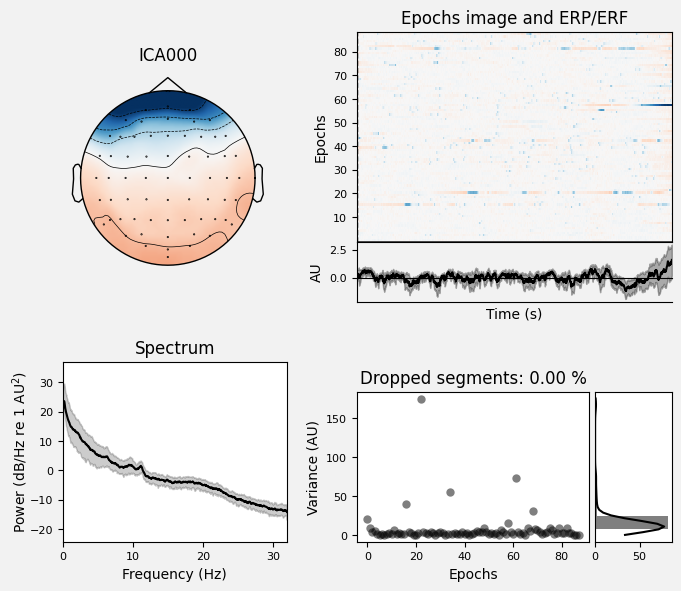

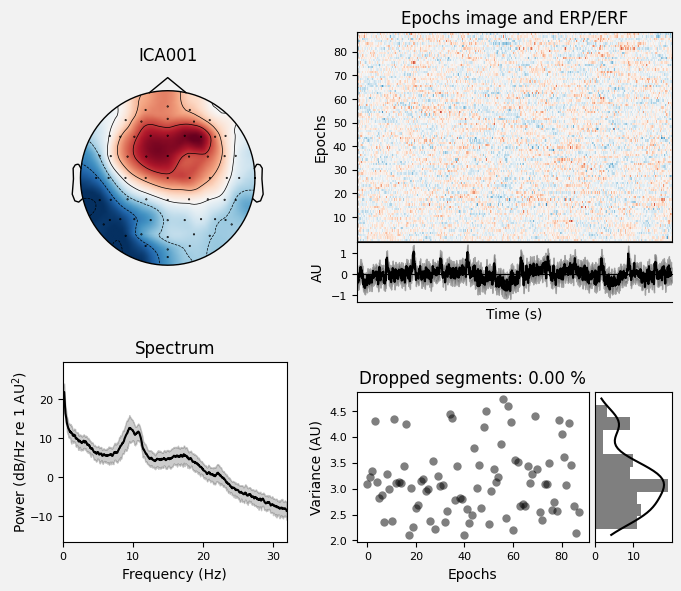

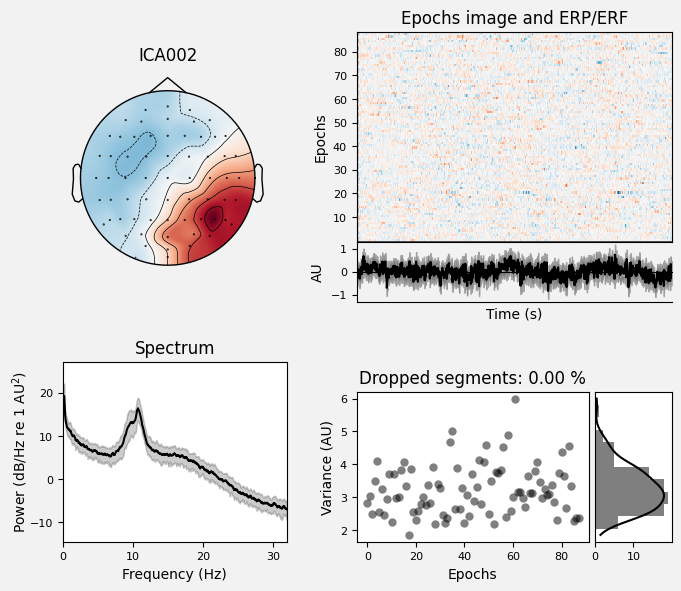

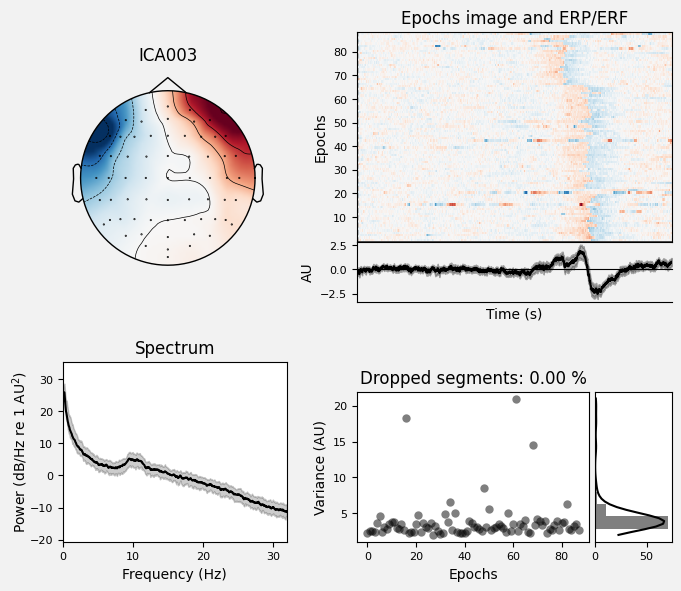

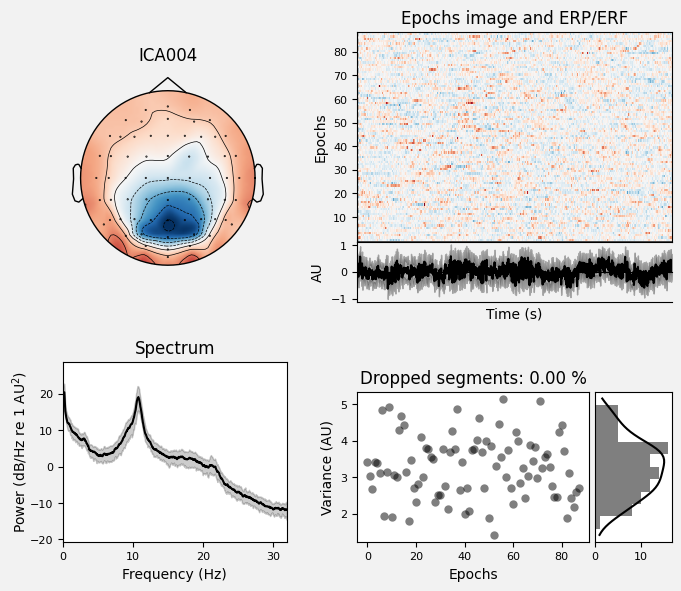

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [28]:
%matplotlib inline 

ica.plot_properties(
    trial_epochs, #[idx_101],
    image_args = {'order': sortOrder},
)

In [29]:
sources = ica.get_sources(trial_epochs).get_data(copy=True)
sources.shape

(88, 10, 1803)

In [30]:
sweeps = sources[:, 3, :]
sweeps.shape

(88, 1803)

# Find time stamps for eye sweeps (carriage returns)

Setting up band-pass filter from 0.2 - 0.25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 0.25 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.25 Hz)
- Filter length: 1057 samples (16.516 s)

1280
1274
1256
1113
1293
1276
1248
1253
1247
1267
1121
1267
1134
1133
1277
1257
1331
1287
1141
1280
1302
1284
1250
1265
1152
1282
1248
1234
1292
1279
1252
1150
1277
1251
1211
1281
1284
1266
1280
1216
1122
1125
1265
1263
1271
1267
1234
1266
1159
1300
1211
1261
1108
1130
1314
1267
1223
1262
1271
1126
1312
1096
1247
1101
1291
1260
1266
1278
1142
1246
1046
1189
1281
1281
1257
1132
1130
1280
1269
1243
994
1158
1194
1275
1237
1131
1276
1319


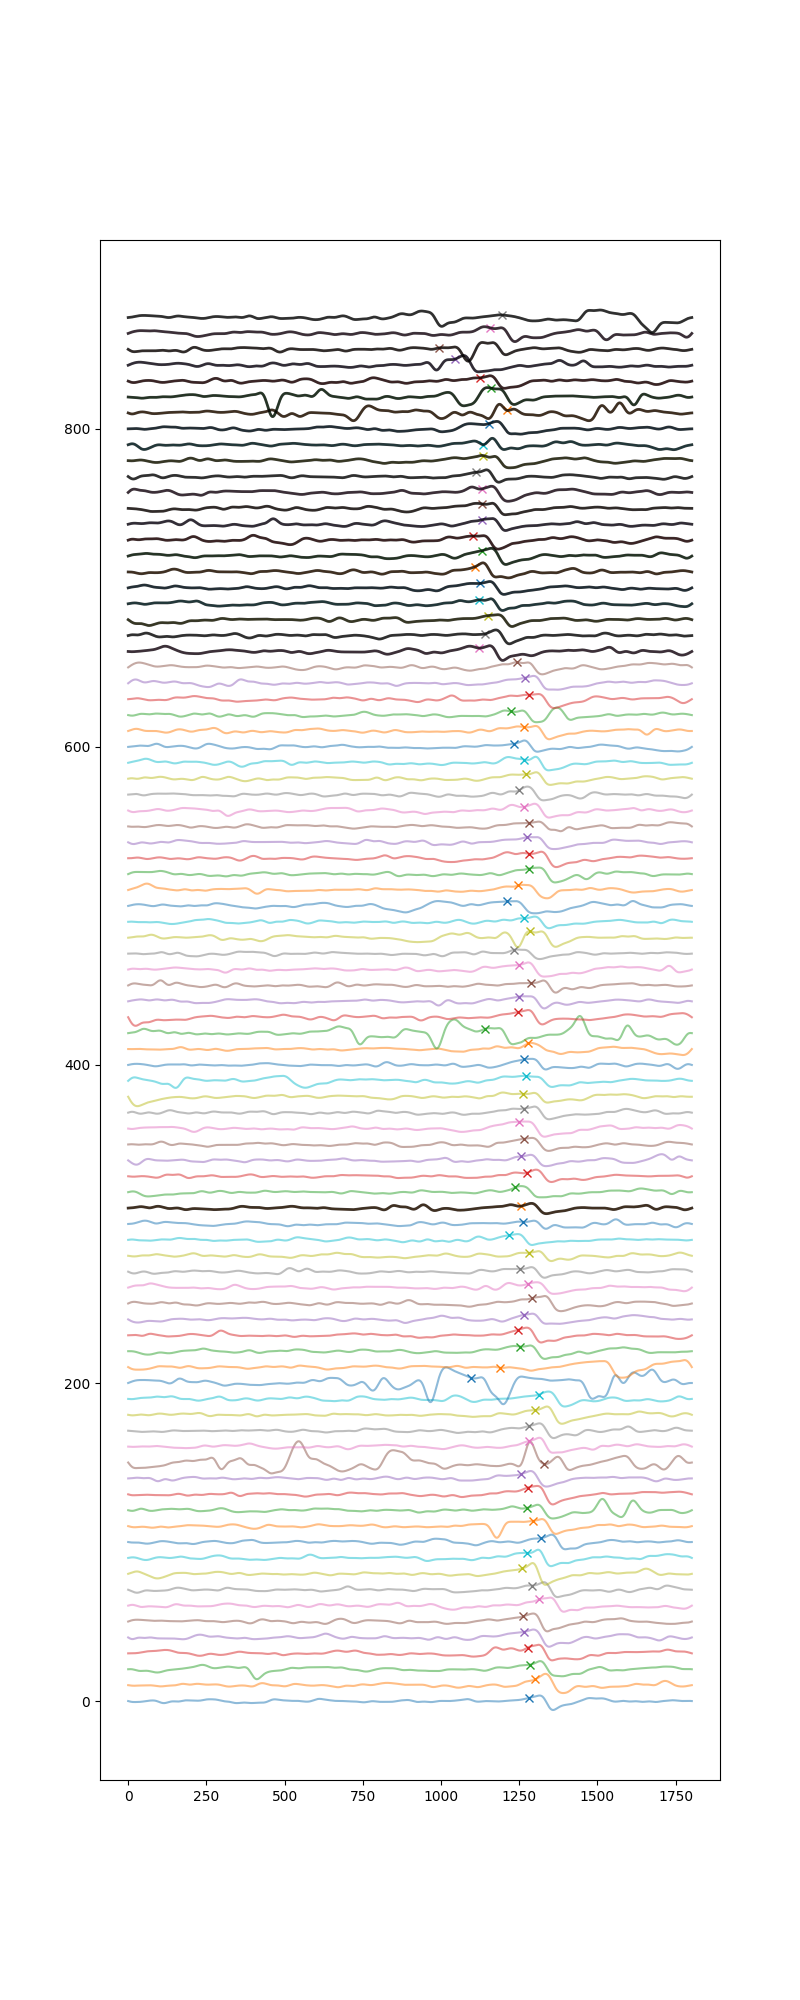

In [31]:
%matplotlib widget

sweeps_filt = mne.filter.filter_data(
    sweeps, 
    sfreq = 64, 
    l_freq = .2, 
    h_freq = .25, 
    copy=True,
)
#sweeps_filt = sweeps_filt[order, :]

# Correlate a candidate chunk of the filtered eye-sweep ICA

max_lags = []
break_offset = 1000
search_len = 400
manual_peak_0 = 1280 # for subject 1, optimize to place 'x' in middle (since its noncausal filter, so edge is in the middle)
for i in range(88):
    peak_corr = np.argmax(
        np.correlate(
            sweeps_filt[i][break_offset:break_offset+search_len] - np.mean(sweeps_filt[i][break_offset:break_offset+search_len]), 
            sweeps_filt[0][break_offset:break_offset+search_len] - np.mean(sweeps_filt[0][break_offset:break_offset+search_len]), 
            mode='full',
        )
    )
    max_lag = manual_peak_0 + peak_corr - (search_len -1)
    print(max_lag)

    max_lags.append(max_lag)
    
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 20))
plt.clf()

# Add DC Offsets to traces for viz
j = 0
for i in list(sortOrder):
    sweeps_filt[i, :] += 10*j #5*i 
    
    line, = plt.plot(sweeps_filt[i, :].T, alpha = 0.5)
    plt.plot(max_lags[i], sweeps_filt[i, :][max_lags[i]], 'x', c=line.get_color())

    j += 1

# highlight chor-101 sweeps (fewer top row measures => earlier sweeps)
plt.plot(sweeps_filt[sortOrder[-22::]].T, color='k', lw=2, alpha = 0.75)
plt.plot(sweeps_filt[sortOrder[31]].T, color='k', lw=2, alpha = 0.75)

plt.show()

In [32]:
# Did the subject misread one trial?
sortOrder[31]

74

In [33]:
df.iloc[sortOrder[31], :] # could chor-038 have been misread as chor-101 for this one trial?

trial              74
condition     Imagery
chorale      chor-038
Name: 74, dtype: object

## Adding annotations for eye sweeps

In [34]:
current_annot = merged_raws.annotations
current_annot # these are just blinks, note annots to be added below

<Annotations | 482 segments: BAD blinker (16), BAD boundary (87), blinker ...>

In [35]:
sweep_annot = mne.Annotations(
    onset=[(max_lags[j] + 1803*j)/64 for j in range(88)],
    duration = [0]*88,
    description='sweep',
)
sweep_annot

<Annotations | 88 segments: sweep (88)>

In [36]:
merged_raws.set_annotations(
    current_annot + sweep_annot
)

<Raw | subject-3_trial-00_chor-096_condition-Listening_raw.fif, 68 x 158664 (2479.1 s), ~82.4 MiB, data loaded>

Sanity check sweep annots:

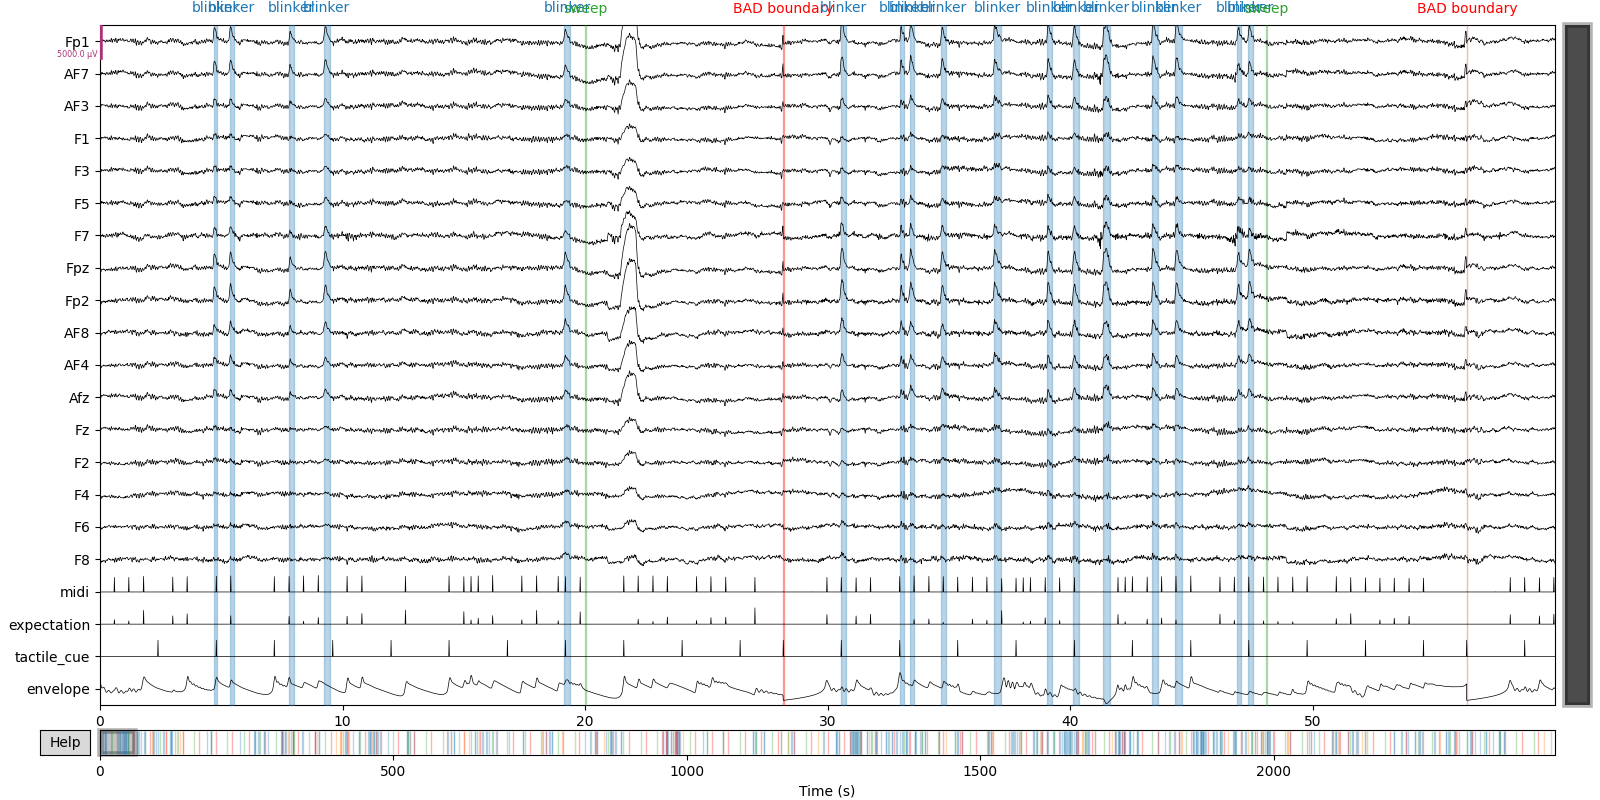

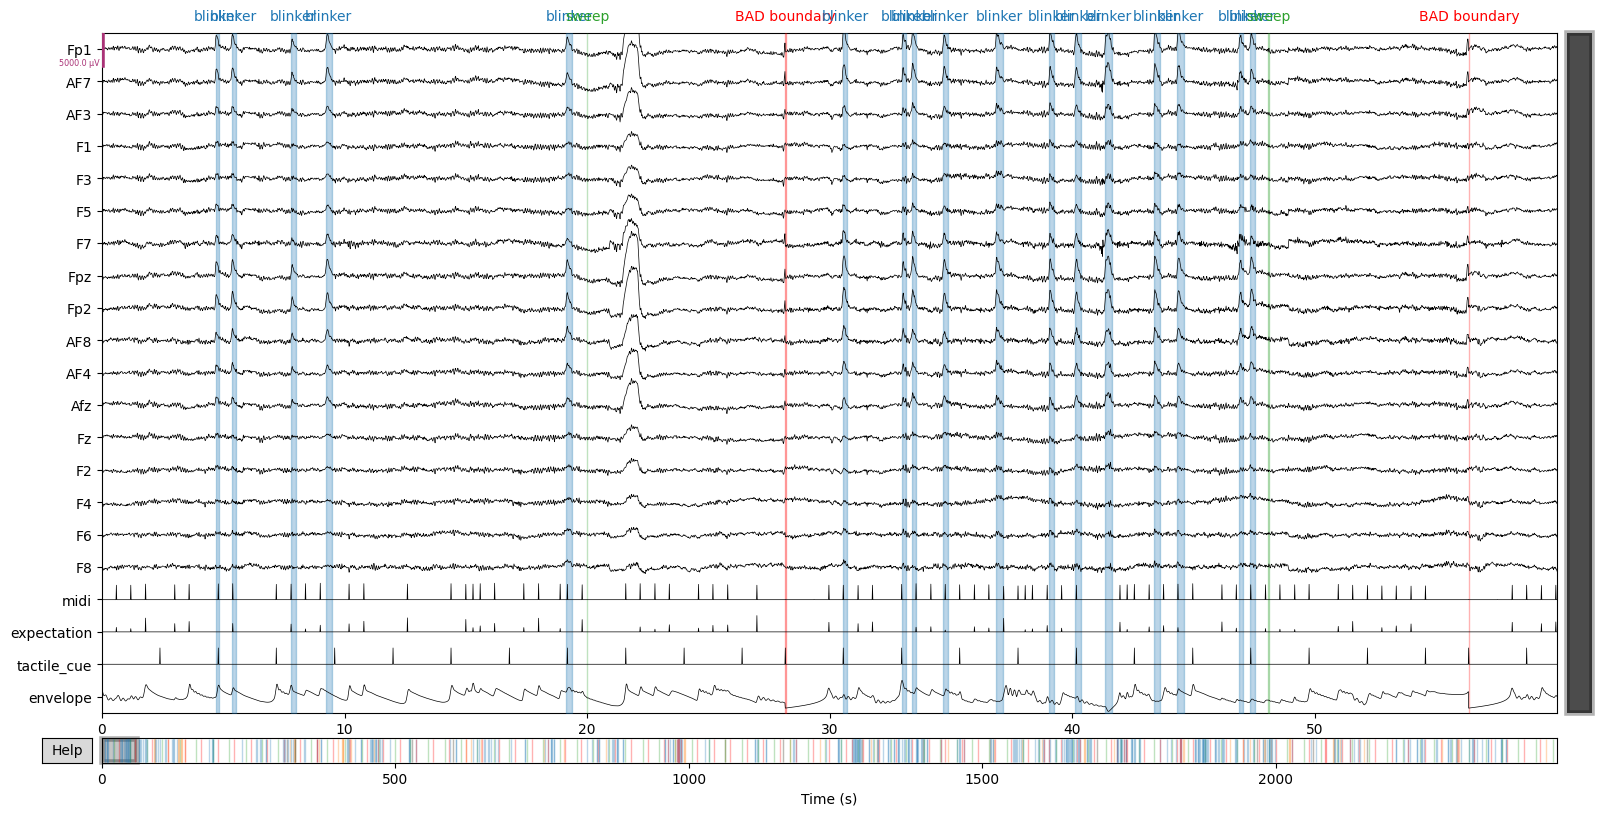

In [37]:
merged_raws.plot(
        n_channels = 64,
        duration = 60,
        scalings = {'eeg': 2.5e-3},
        #highpass = 1,
        #lowpass = 20,
        #group_by = 'position',
        picks = ['Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'Afz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'midi', 'expectation', 'envelope', 'tactile_cue']
    )

# Debugging filename cond-chor labeling error (fixed 5/21)

In [40]:
from scipy.io import loadmat

stim_mat = loadmat(STIM_MAT_PATH, simplify_cells = True) 
stim = stim_mat['stim']
# print(stim)

stimIdxs = stim['stimIdxs']
print(f'stimIdxs shape (N trials): {stimIdxs.shape}')

condIdxs = stim['condIdxs']
print(f'condIdxs shape (N trials): {condIdxs.shape}')

# Path to data for selected subject
sub1_mat = loadmat(os.path.join(EEG_MAT_PATH, f"dataSub{SUBJECT}.mat"), simplify_cells = True) 

# Randomized trial order for current subject
orig_trial_pos = sub1_mat['eeg']['origTrialPosition']
#print(f'orig_trial_pos shape: {orig_trial_pos.shape}')

# Get current subject's song and condition ordering (since its randomized)
thisSubStimOrder = stimIdxs[(orig_trial_pos-1)] # convert to being zero indexed
thisSubCondOrder = condIdxs[(orig_trial_pos-1)]

stimIdxs shape (N trials): (88,)
condIdxs shape (N trials): (88,)


In [41]:
thisSubStimOrder

array([1, 2, 2, 3, 4, 4, 1, 2, 2, 2, 3, 1, 3, 3, 4, 4, 4, 1, 3, 4, 4, 4,
       1, 2, 3, 4, 1, 1, 2, 2, 2, 3, 4, 2, 3, 4, 1, 1, 2, 2, 3, 3, 4, 4,
       1, 1, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 1, 2, 2, 3, 4, 4, 1, 3, 4, 4,
       2, 2, 2, 2, 3, 4, 1, 1, 2, 3, 3, 1, 1, 1, 3, 3, 3, 1, 2, 3, 4, 4],
      dtype=uint8)

In [42]:
thisSubCondOrder

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
      dtype=uint8)

# Make a new raw object

In [44]:
final_raw = make_new_raw(
    merged_raws,
    signal, # blink IC
    usedSignal, # label of the blink IC
    note_annot, # note and break annotations
)

Used Annotations descriptions: ['BAD blinker', 'BAD boundary', 'blinker', 'manual', 'sweep']
Total valid blinks: 363
Total sweeps: 88


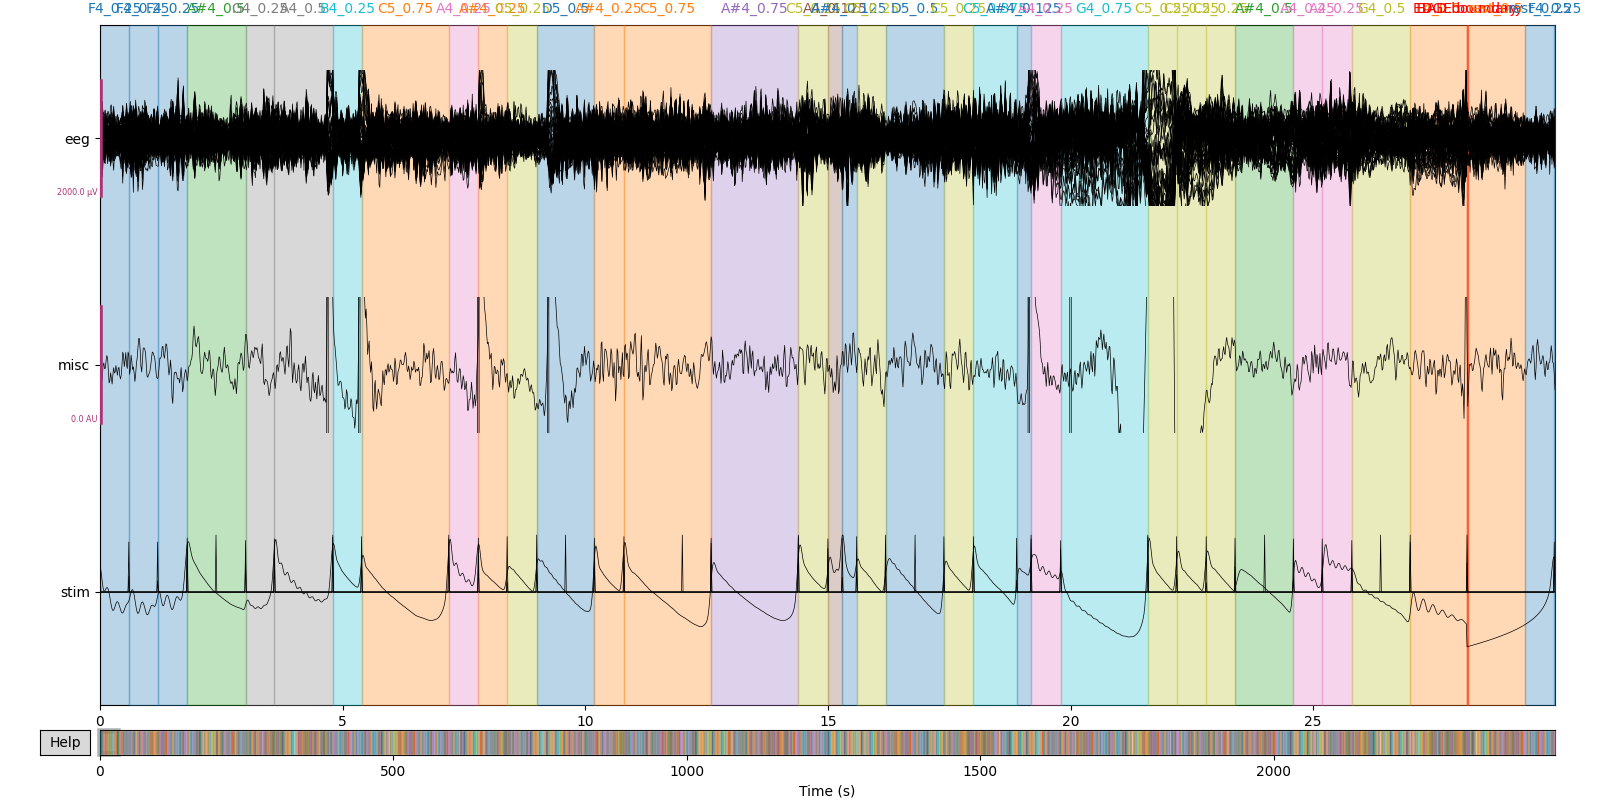

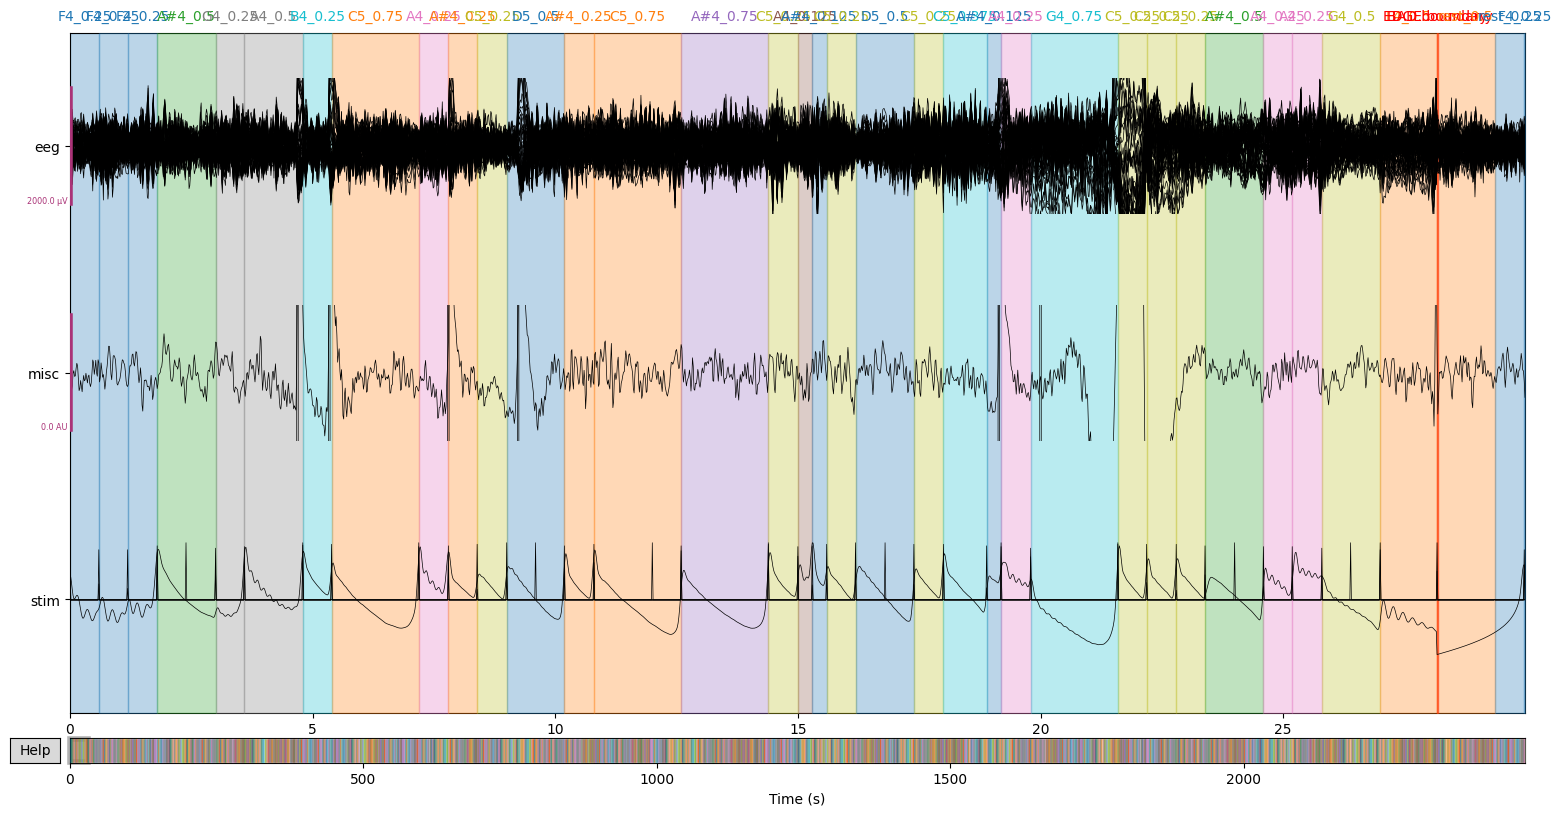

In [45]:
final_raw.plot(
    scalings = {'eeg': 1e-3, 'misc': 200e-6},
    duration = 30,
    butterfly = True,
)

In [46]:
overwrite = True
final_raw.save(
    fname = os.path.join(MERGED_FIF_PATH, f'subject-{SUBJECT}_blinks_merged_raw.fif'),
    overwrite = overwrite
)

Writing /local_disk/abhinav/eye-blink-music/3-find-blinks/3.2-manually-select-blinker-blinks/merged-fif/subject-3_blinks_merged_raw.fif
Closing /local_disk/abhinav/eye-blink-music/3-find-blinks/3.2-manually-select-blinker-blinks/merged-fif/subject-3_blinks_merged_raw.fif
[done]


[PosixPath('/local_disk/abhinav/eye-blink-music/3-find-blinks/3.2-manually-select-blinker-blinks/merged-fif/subject-3_blinks_merged_raw.fif')]